In [9]:
import mglearn
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [3]:
#전처리르 잘하면 k-mean도 괜찮다 즉 클러스들 사이의 공간을 벌릴 수 있으면 좋다.

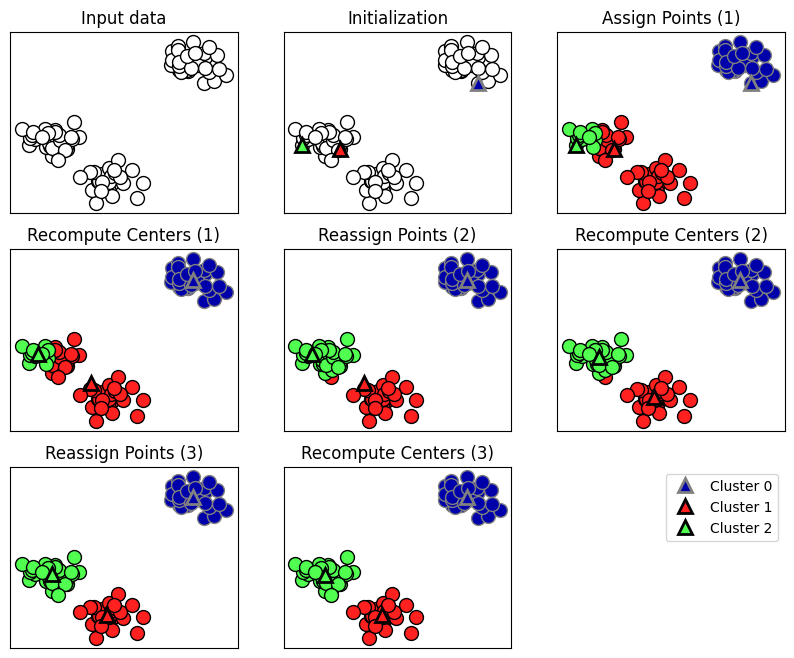

In [4]:
mglearn.plots.plot_kmeans_algorithm()

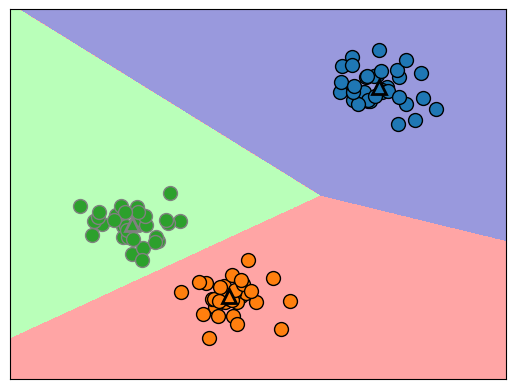

In [5]:

#노이즈 검출이 안된다.
#해석이 중요하다....
#k-mean은 맛보기
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [6]:
X, y = make_blobs(random_state=1)

kMeans = KMeans(n_clusters=3)
kMeans.fit(X)

c:\CODE\머신러닝\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
KMeans.predict(X)

TypeError: predict() missing 1 required positional argument: 'X'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans, DBSCAN

plt.rcParams["font.family"] ="Malgun Gothic"

In [12]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people, random_state=42)

In [14]:
nmf = NMF(n_components=100, init='nndsvd', max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

c:\CODE\머신러닝\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
X_reconstructed_kmeans

array([[0.00161086, 0.00163917, 0.00160476, ..., 0.0022719 , 0.00220721,
        0.00212226],
       [0.00095245, 0.00097552, 0.00103806, ..., 0.00223555, 0.00215507,
        0.00210432],
       [0.00095925, 0.00104415, 0.00122613, ..., 0.00104383, 0.00096309,
        0.00091535],
       ...,
       [0.00150231, 0.00157263, 0.00166122, ..., 0.00299917, 0.00272812,
        0.00257801],
       [0.0009132 , 0.00089142, 0.00086139, ..., 0.00178521, 0.00172974,
        0.00175079],
       [0.00127487, 0.00126507, 0.00127287, ..., 0.00186729, 0.00181313,
        0.00180778]], dtype=float32)

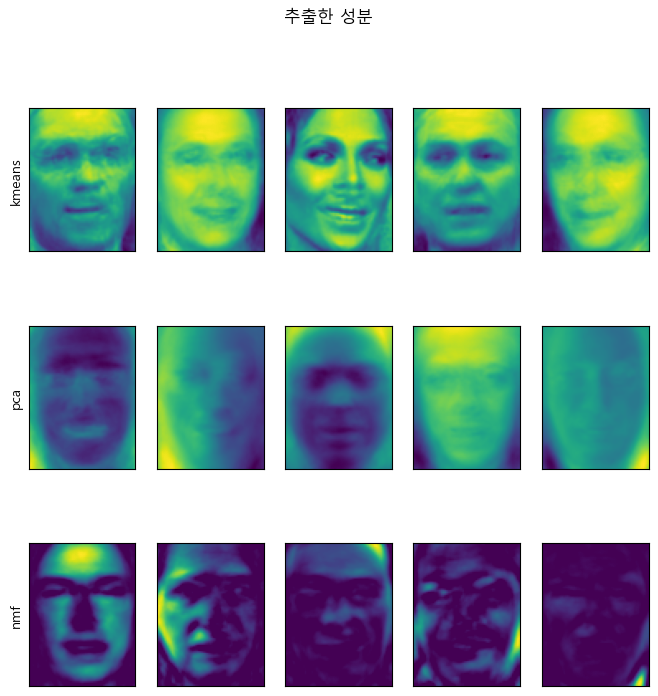

In [25]:
# fig, axes = plt.subplots(3,5, figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})
# fig.suptitle("추출한 성분")
# image_shape = people.images[0].shape
# for ax, comp_kmeans, comp_pca, comp_nmf in zip(
#     axes.T, kmeans.cluster_centers_,pca.components_,nmf.components_
# ):
#     ax[0].imshow(comp_kmeans.reshape(image_shape))
#     ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
#     ax[2].imshow(comp_nmf.reshape(image_shape))
# axes[0, 0].set_ylabel('kmeans')
# axes[1, 0].set_ylabel('pca')
# axes[2, 0].set_ylabel('nmf')

# plt.show()

# zip(), enumerate()
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
image_shape = people.images[0].shape
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
plt.show()

In [ ]:
fig, axes = plt.subplots(4,5, subplot_kw={'xticks':(),'yticks':()})
fig.subtitle("추출한 성분")
image_shape = people.images[0].shape
for ax, comp_kmeans

In [ ]:
noise = X_people[labels == -1]